***BASE 1***

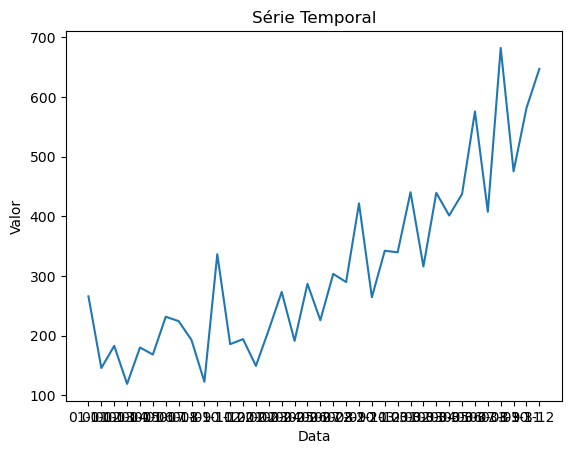

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

caminho_do_csv = r"G:\Meu Drive\Drive dnasc\Especialização IFMG\Disciplinas\8 - Séries temporais\Lista 3 (08 de nov)\shampoo_sales - shampoo_sales.csv"

# Carregando os dados do CSV para um DataFrame
dados_serie_temporal = pd.read_csv(caminho_do_csv)

# Criando um gráfico usando Matplotlib
plt.plot(dados_serie_temporal['Month'], dados_serie_temporal['Sales'])
plt.title('Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()


**Parte 1: Escolher Modelos**
A. Modelo AR (AutoRegressivo):

Vamos escolher um modelo AR(1) como exemplo.
B. Modelo de Suavização Exponencial:

Vamos escolher o modelo Holt-Winters como exemplo.
C. Modelo ARIMA (AutoRegressivo Integrado de Médias Móveis):

Vamos escolher um modelo ARIMA(1,1,1) como exemplo.

**Parte 2: Separar a base de dados em treinamento e teste**


In [15]:
from sklearn.model_selection import train_test_split

# Substitua 'sua_coluna_de_datas' e 'sua_coluna_de_valores' pelos nomes reais das colunas
X = dados_serie_temporal['Month']
y = dados_serie_temporal['Sales']

# Separar a base de dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


**Parte 3: Aplicar cada método de previsão usando validação cruzada**


In [16]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para avaliar o desempenho do modelo
def avaliar_desempenho(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return mae, rmse, smape

# Modelo AR(1)
modelo_ar = AutoReg(y_train, lags=1).fit()
previsao_ar = modelo_ar.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Modelo de Suavização Exponencial (Holt-Winters)
modelo_hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
previsao_hw = modelo_hw.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Modelo ARIMA(1,1,1)
modelo_arima = ARIMA(y_train, order=(1, 1, 1)).fit()
previsao_arima = modelo_arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')



**Parte 4: Medir o desempenho de cada modelo**


In [17]:
# Avaliar o desempenho do modelo AR(1)
mae_ar, rmse_ar, smape_ar = avaliar_desempenho(y_test, previsao_ar)

# Avaliar o desempenho do modelo Holt-Winters
mae_hw, rmse_hw, smape_hw = avaliar_desempenho(y_test, previsao_hw)

# Avaliar o desempenho do modelo ARIMA(1,1,1)
mae_arima, rmse_arima, smape_arima = avaliar_desempenho(y_test, previsao_arima)

# Exibir resultados
print(f"Desempenho do Modelo AR(1): MAE={mae_ar}, RMSE={rmse_ar}, SMAPE={smape_ar}")
print(f"Desempenho do Modelo Holt-Winters: MAE={mae_hw}, RMSE={rmse_hw}, SMAPE={smape_hw}")
print(f"Desempenho do Modelo ARIMA(1,1,1): MAE={mae_arima}, RMSE={rmse_arima}, SMAPE={smape_arima}")


Desempenho do Modelo AR(1): MAE=246.23218810241644, RMSE=275.07624340746435, SMAPE=58.913250372457505
Desempenho do Modelo Holt-Winters: MAE=133.05231080684126, RMSE=164.3070673919742, SMAPE=27.189487063464657
Desempenho do Modelo ARIMA(1,1,1): MAE=143.6221180032492, RMSE=176.11843218463756, SMAPE=29.52020046938582


**Parte 5: Ilustrar o desempenho do melhor modelo**


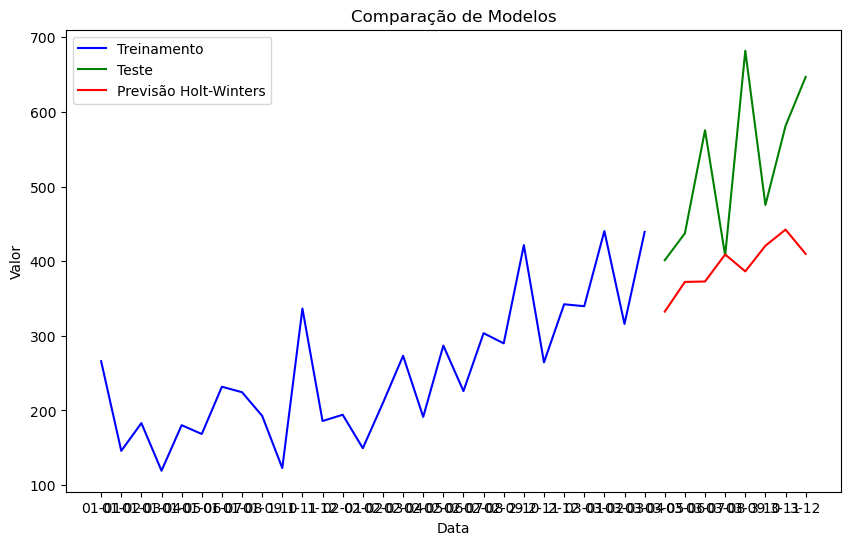

In [19]:
# Escolher o modelo com o menor RMSE (ou a métrica de sua preferência)
melhor_modelo = 'Holt-Winters'  # Substitua pelo modelo que teve o melhor desempenho

# Plotar previsões do melhor modelo
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Treinamento', color='blue')
plt.plot(X_test, y_test, label='Teste', color='green')
if melhor_modelo == 'AR(1)':
    plt.plot(X_test, previsao_ar, label='Previsão AR(1)', color='red')
elif melhor_modelo == 'Holt-Winters':
    plt.plot(X_test, previsao_hw, label='Previsão Holt-Winters', color='red')
elif melhor_modelo == 'ARIMA(1,1,1)':
    plt.plot(X_test, previsao_arima, label='Previsão ARIMA(1,1,1)', color='red')

plt.title('Comparação de Modelos')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()


***BASE 2***

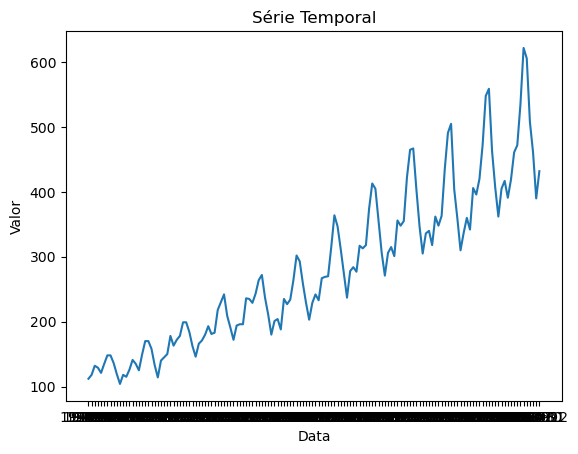

In [20]:
caminho_do_csv = r"G:\Meu Drive\Drive dnasc\Especialização IFMG\Disciplinas\8 - Séries temporais\Lista 3 (08 de nov)\airline-passengers - airline-passengers.csv"

# Carregando os dados do CSV para um DataFrame
dados_serie_temporal_2 = pd.read_csv(caminho_do_csv)

# Criando um gráfico usando Matplotlib
plt.plot(dados_serie_temporal_2['Month'], dados_serie_temporal_2['Passengers'])
plt.title('Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()


**Parte 1: Escolher Modelos A. Modelo AR (AutoRegressivo):**

Vamos escolher um modelo AR(1) como exemplo. B. Modelo de Suavização Exponencial:

Vamos escolher o modelo Holt-Winters como exemplo. C. Modelo ARIMA (AutoRegressivo Integrado de Médias Móveis):

Vamos escolher um modelo ARIMA(1,1,1) como exemplo.

**Parte 2: Separar a base de dados em treinamento e teste**

In [23]:
from sklearn.model_selection import train_test_split

# Substitua 'sua_coluna_de_datas' e 'sua_coluna_de_valores' pelos nomes reais das colunas
X = dados_serie_temporal_2['Month']
y = dados_serie_temporal_2['Passengers']

# Separar a base de dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


**Parte 3: Aplicar cada método de previsão usando validação cruzada**


In [24]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para avaliar o desempenho do modelo
def avaliar_desempenho(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return mae, rmse, smape

# Modelo AR(1)
modelo_ar = AutoReg(y_train, lags=1).fit()
previsao_ar = modelo_ar.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Modelo de Suavização Exponencial (Holt-Winters)
modelo_hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
previsao_hw = modelo_hw.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Modelo ARIMA(1,1,1)
modelo_arima = ARIMA(y_train, order=(1, 1, 1)).fit()
previsao_arima = modelo_arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')


**Parte 4: Medir o desempenho de cada modelo**


In [25]:
# Avaliar o desempenho do modelo AR(1)
mae_ar, rmse_ar, smape_ar = avaliar_desempenho(y_test, previsao_ar)

# Avaliar o desempenho do modelo Holt-Winters
mae_hw, rmse_hw, smape_hw = avaliar_desempenho(y_test, previsao_hw)

# Avaliar o desempenho do modelo ARIMA(1,1,1)
mae_arima, rmse_arima, smape_arima = avaliar_desempenho(y_test, previsao_arima)

# Exibir resultados
print(f"Desempenho do Modelo AR(1): MAE={mae_ar}, RMSE={rmse_ar}, SMAPE={smape_ar}")
print(f"Desempenho do Modelo Holt-Winters: MAE={mae_hw}, RMSE={rmse_hw}, SMAPE={smape_hw}")
print(f"Desempenho do Modelo ARIMA(1,1,1): MAE={mae_arima}, RMSE={rmse_arima}, SMAPE={smape_arima}")


Desempenho do Modelo AR(1): MAE=73.57724914293804, RMSE=88.67744444547724, SMAPE=16.43727532908367
Desempenho do Modelo Holt-Winters: MAE=31.787038698656254, RMSE=39.25683906328257, SMAPE=7.029342105092222
Desempenho do Modelo ARIMA(1,1,1): MAE=85.25415597436435, RMSE=97.49961969229068, SMAPE=18.812238109315178


**Parte 5: Ilustrar o desempenho do melhor modelo**


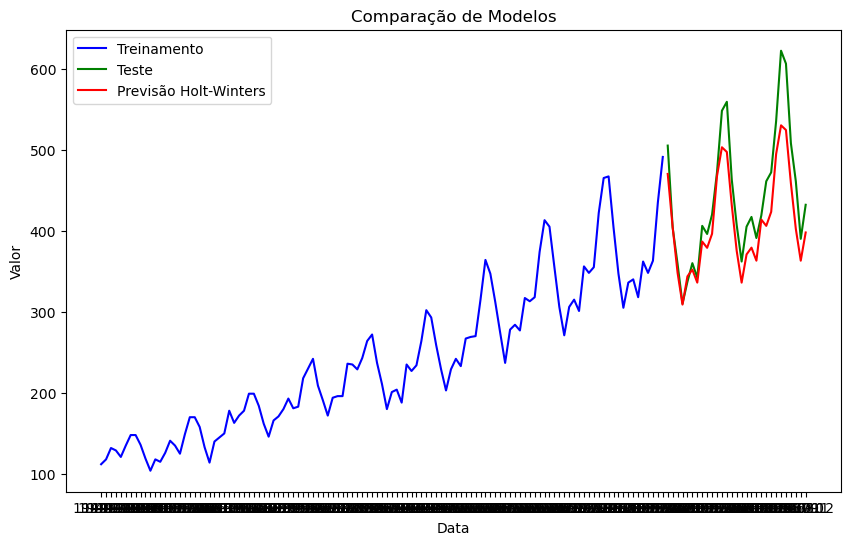

In [26]:
# Escolher o modelo com o menor RMSE (ou a métrica de sua preferência)
melhor_modelo = 'Holt-Winters'  # Substitua pelo modelo que teve o melhor desempenho

# Plotar previsões do melhor modelo
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Treinamento', color='blue')
plt.plot(X_test, y_test, label='Teste', color='green')
if melhor_modelo == 'AR(1)':
    plt.plot(X_test, previsao_ar, label='Previsão AR(1)', color='red')
elif melhor_modelo == 'Holt-Winters':
    plt.plot(X_test, previsao_hw, label='Previsão Holt-Winters', color='red')
elif melhor_modelo == 'ARIMA(1,1,1)':
    plt.plot(X_test, previsao_arima, label='Previsão ARIMA(1,1,1)', color='red')

plt.title('Comparação de Modelos')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()


***BASE 3***

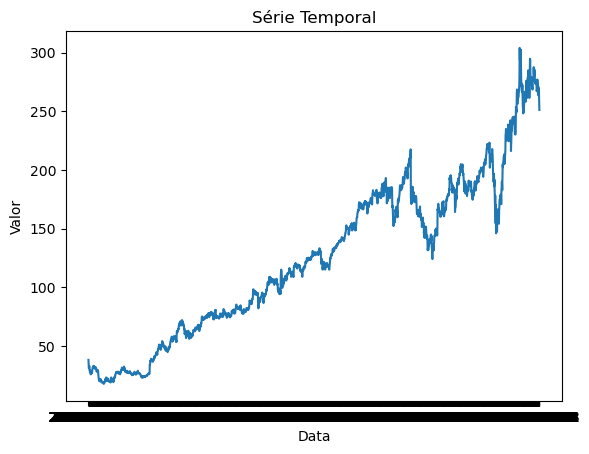

In [100]:
caminho_do_csv = r"G:\Meu Drive\Drive dnasc\Especialização IFMG\Disciplinas\8 - Séries temporais\Lista 3 (08 de nov)\facebook-historical-stock-price.csv"

# Carregando os dados do CSV para um DataFrame
dados_serie_temporal_3 = pd.read_csv(caminho_do_csv)

# Criando um gráfico usando Matplotlib
plt.plot(dados_serie_temporal_3['Date'], dados_serie_temporal_3['Close'])
plt.title('Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()


**Parte 1: Escolher Modelos A. Modelo AR (AutoRegressivo):**

Vamos escolher um modelo AR(1) como exemplo. B. Modelo de Suavização Exponencial:

Vamos escolher o modelo Holt-Winters como exemplo. C. Modelo ARIMA (AutoRegressivo Integrado de Médias Móveis):

Vamos escolher um modelo ARIMA(1,0,1) como exemplo.

**Parte 2: Separar a base de dados em treinamento e teste**

In [101]:
from sklearn.model_selection import train_test_split

# Substitua 'sua_coluna_de_datas' e 'sua_coluna_de_valores' pelos nomes reais das colunas
X = dados_serie_temporal_3['Date']
y = dados_serie_temporal_3['Close']

# Separar a base de dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


**Parte 3: Aplicar cada método de previsão usando validação cruzada**

In [102]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para avaliar o desempenho do modelo
def avaliar_desempenho(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return mae, rmse, smape



**Parte 4: Medir o desempenho de cada modelo**


In [103]:
# Modelo AR(1)
modelo_ar = AutoReg(y_train, lags=1).fit()
previsao_ar = modelo_ar.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)



In [104]:
# Modelo de Suavização Exponencial (Holt-Winters)
modelo_hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
previsao_hw = modelo_hw.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)



In [105]:
# Modelo ARIMA(1,0,1)
modelo_arima = ARIMA(y_train, order=(1, 0, 1)).fit()
previsao_arima = modelo_arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')


In [106]:
# Avaliar desempenho
mae_ar, rmse_ar, smape_ar = avaliar_desempenho(y_test, previsao_ar)
mae_hw, rmse_hw, smape_hw = avaliar_desempenho(y_test, previsao_hw)
mae_arima, rmse_arima, smape_arima = avaliar_desempenho(y_test, previsao_arima)


In [107]:
# Exibir métricas de desempenho
print("Desempenho do Modelo AR(1):")
print(f"MAE: {mae_ar}, RMSE: {rmse_ar}, SMAPE: {smape_ar}")

print("\nDesempenho do Modelo Holt-Winters:")
print(f"MAE: {mae_hw}, RMSE: {rmse_hw}, SMAPE: {smape_hw}")

print("\nDesempenho do Modelo ARIMA(1,0,1):")
print(f"MAE: {mae_arima}, RMSE: {rmse_arima}, SMAPE: {smape_arima}")

Desempenho do Modelo AR(1):
MAE: 33.55981086018241, RMSE: 45.09287798445419, SMAPE: 15.415730638950183

Desempenho do Modelo Holt-Winters:
MAE: 25.68879404819493, RMSE: 34.30545586806745, SMAPE: 11.543033066208515

Desempenho do Modelo ARIMA(1,0,1):
MAE: 48.057031299953636, RMSE: 63.15907426574645, SMAPE: 23.334902676446383


**Parte 5: Ilustrar o desempenho do melhor modelo**


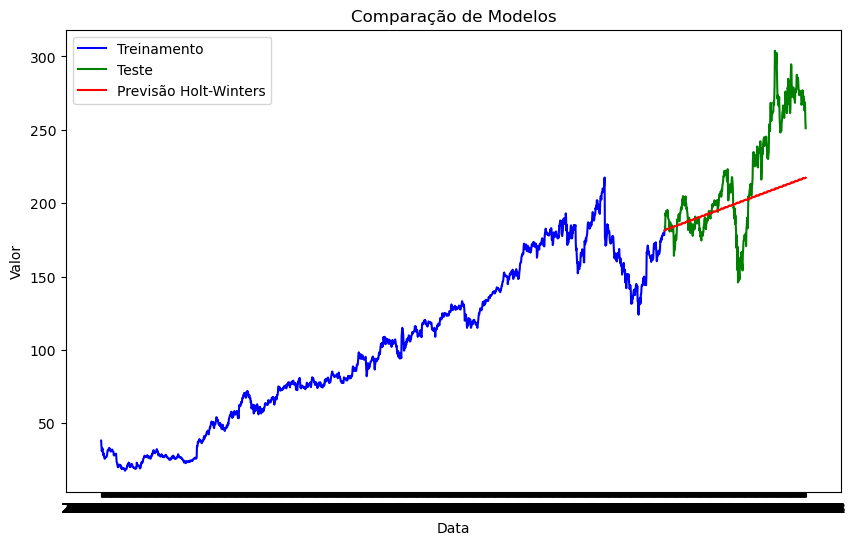

In [108]:
# Escolher o modelo com o menor RMSE (ou a métrica de sua preferência)
melhor_modelo = 'Holt-Winters'  # Substitua pelo modelo que teve o melhor desempenho

# Plotar previsões do melhor modelo
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Treinamento', color='blue')
plt.plot(X_test, y_test, label='Teste', color='green')
if melhor_modelo == 'AR(1)':
    plt.plot(X_test, previsao_ar, label='Previsão AR(1)', color='red')
elif melhor_modelo == 'Holt-Winters':
    plt.plot(X_test, previsao_hw, label='Previsão Holt-Winters', color='red')
elif melhor_modelo == 'ARIMA(1,1,1)':
    plt.plot(X_test, previsao_arima, label='Previsão ARIMA(1,1,1)', color='red')

plt.title('Comparação de Modelos')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

***BASE 4***

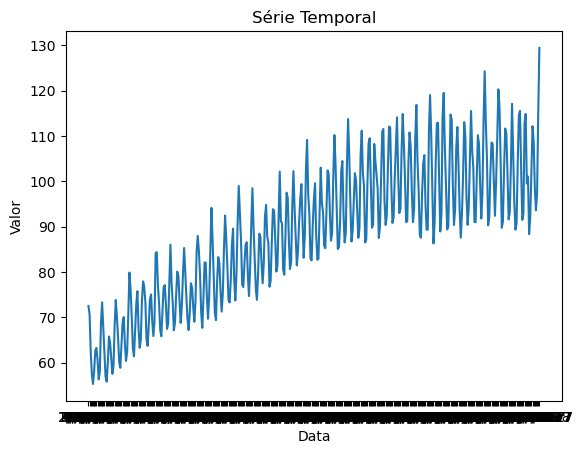

In [109]:
caminho_do_csv = r"G:\Meu Drive\Drive dnasc\Especialização IFMG\Disciplinas\8 - Séries temporais\Lista 3 (08 de nov)\Electric_Production.csv"

# Carregando os dados do CSV para um DataFrame
dados_serie_temporal_4 = pd.read_csv(caminho_do_csv)

# Criando um gráfico usando Matplotlib
plt.plot(dados_serie_temporal_4['DATE'], dados_serie_temporal_4['IPG2211A2N'])
plt.title('Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()


**Parte 1: Escolher Modelos A. Modelo AR (AutoRegressivo):**

Vamos escolher um modelo AR(1) como exemplo. B. Modelo de Suavização Exponencial:

Vamos escolher o modelo Holt-Winters como exemplo. C. Modelo ARIMA (AutoRegressivo Integrado de Médias Móveis):

Vamos escolher um modelo ARIMA(1,0,1) como exemplo.

**Parte 2: Separar a base de dados em treinamento e teste**

In [111]:
from sklearn.model_selection import train_test_split

# Substitua 'sua_coluna_de_datas' e 'sua_coluna_de_valores' pelos nomes reais das colunas
X = dados_serie_temporal_4['DATE']
y = dados_serie_temporal_4['IPG2211A2N']

# Separar a base de dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Parte 3: Aplicar cada método de previsão usando validação cruzada**

In [112]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para avaliar o desempenho do modelo
def avaliar_desempenho(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return mae, rmse, smape



**Parte 4: Medir o desempenho de cada modelo**


In [113]:
# Modelo AR(1)
modelo_ar = AutoReg(y_train, lags=1).fit()
previsao_ar = modelo_ar.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Modelo de Suavização Exponencial (Holt-Winters)
modelo_hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
previsao_hw = modelo_hw.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Modelo ARIMA(1,0,1)
modelo_arima = ARIMA(y_train, order=(1, 0, 1)).fit()
previsao_arima = modelo_arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Avaliar desempenho
mae_ar, rmse_ar, smape_ar = avaliar_desempenho(y_test, previsao_ar)
mae_hw, rmse_hw, smape_hw = avaliar_desempenho(y_test, previsao_hw)
mae_arima, rmse_arima, smape_arima = avaliar_desempenho(y_test, previsao_arima)

# Exibir métricas de desempenho
print("Desempenho do Modelo AR(1):")
print(f"MAE: {mae_ar}, RMSE: {rmse_ar}, SMAPE: {smape_ar}")

print("\nDesempenho do Modelo Holt-Winters:")
print(f"MAE: {mae_hw}, RMSE: {rmse_hw}, SMAPE: {smape_hw}")

print("\nDesempenho do Modelo ARIMA(1,0,1):")
print(f"MAE: {mae_arima}, RMSE: {rmse_arima}, SMAPE: {smape_arima}")


Desempenho do Modelo AR(1):
MAE: 16.563970809910565, RMSE: 19.13815179437312, SMAPE: 17.080944265910187

Desempenho do Modelo Holt-Winters:
MAE: 4.4195762584392515, RMSE: 5.3083081604431355, SMAPE: 4.226093944139661

Desempenho do Modelo ARIMA(1,0,1):
MAE: 16.95522182245579, RMSE: 19.472305032308224, SMAPE: 17.537558631563012


**Parte 5: Ilustrar o desempenho do melhor modelo**


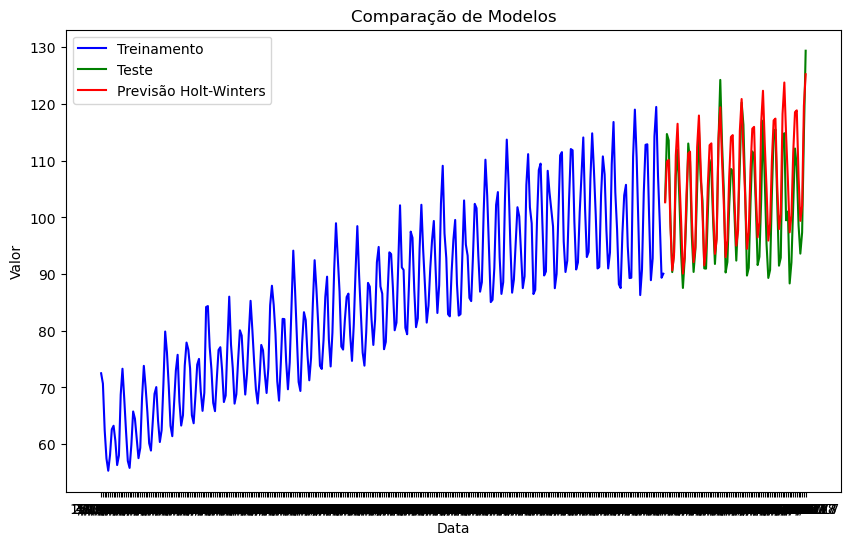

In [114]:
# Escolher o modelo com o menor RMSE (ou a métrica de sua preferência)
melhor_modelo = 'Holt-Winters'  # Substitua pelo modelo que teve o melhor desempenho

# Plotar previsões do melhor modelo
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Treinamento', color='blue')
plt.plot(X_test, y_test, label='Teste', color='green')
if melhor_modelo == 'AR(1)':
    plt.plot(X_test, previsao_ar, label='Previsão AR(1)', color='red')
elif melhor_modelo == 'Holt-Winters':
    plt.plot(X_test, previsao_hw, label='Previsão Holt-Winters', color='red')
elif melhor_modelo == 'ARIMA(1,0,1)':
    plt.plot(X_test, previsao_arima, label='Previsão ARIMA(1,1,1)', color='red')

plt.title('Comparação de Modelos')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()